In [44]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import numpy as np
import matplotlib.pyplot as plt
import potentials
import neighbors
from opinions import OpinionModel

In [45]:
models = []
for i in range(20):
    nsteps=500
    nagents=6
    P = []
    for i in range(nagents):
        arr = []
        for j in range(nagents):
            arr.append(-1)
        P.append(arr)
    neighbs = neighbors.totally_connected(nagents, self_connected=True)
    #neighbors = degree_connected(nagents, 1) #the second parameter ranges from 0 to 1, generates graphs of varying degrees of connectedness.
    opinions = [[np.random.rand(), np.random.rand()] for i in range(nagents)]
    #Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
    pots = [potentials.tent(1) for i in range(nagents)]
    coupling = [[1,0],[0,1]] #the inverse of these values is what has effects. So matrices of large values would be similar to no coupling.
    model = OpinionModel(nagents, neighbs, opinions, pots, coupling)
    models.append(model)

In [46]:
#Takes about 2 minutes to run 20 tests.
for model in models:
    model.ALPHA = .001
    model.run(nsteps)

In [47]:
agent_opinions = []
for model in models:
    agent_opinion = model.datacollector.get_agent_vars_dataframe()
    agent_opinions.append(agent_opinion)

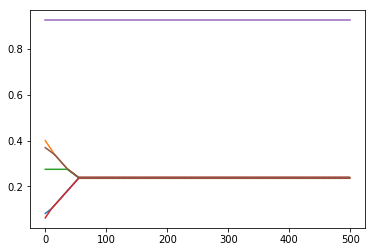

In [48]:
x=agent_opinions[0].Opinion0.as_matrix().reshape((nsteps, nagents))
plt.plot(x)

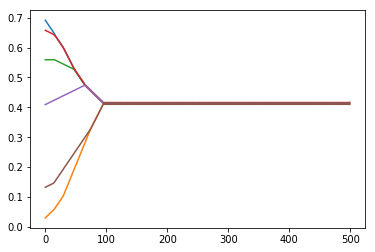

In [49]:
y=agent_opinions[0].Opinion1.as_matrix().reshape((nsteps, nagents))
plt.plot(y)